In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from load_helpers import load
from metric_helpers import (bin_data, binned_positive_label_prob, apply_to_all, apply_to_merged_splits,
                            meta_confidence_and_accuracy, tpr_diff_and_accuracy)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [22]:
dataset_name = "adult"
sensitives = ["race"]
split_ids = [0, 1, 2]
#algo_names = ["ULR_eq_opp_in_False", "ULR_eq_opp_in_True", "ULR_in_False", "ULR_in_True"]
algo_names = ["ULR_in_False", "ULR_in_True"]
dataset, results = load(dataset_name, sensitives, split_ids, algo_names)

No handles with labels found to put in legend.


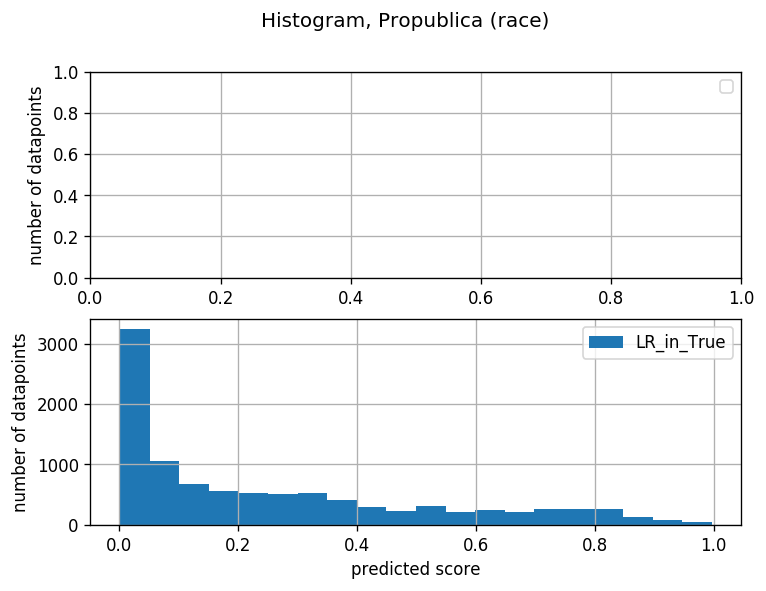

In [23]:
fig, plots = plt.subplots(2, 1, figsize=(7, 5), dpi=120)
#plot.plot(results_propublica['UGP_eq_opp_in_False']['race'][0]['pred_mean'], propublica['race'][0]['ytest'], 'o')
#plots[0].hist(results['ULR_eq_opp_in_True']['race'][0]['pred_mean'], bins=20, label='LR_eq_opp_in_True')
plots[1].hist(results['ULR_in_True']['race'][0]['pred_mean'], bins=20, label='LR_in_True')
plots[1].set_xlabel('predicted score')
for plot in plots:
    plot.set_ylabel('number of datapoints')
    #plot.set_xlim((.47, .54))
    plot.grid()
    plot.legend()
fig.suptitle('Histogram, Propublica (race)')
fig.savefig('histogram_adult_race_lr.svg')

In [6]:
conf_acc = apply_to_merged_splits(meta_confidence_and_accuracy(15), results, dataset)

In [19]:
conf_acc_s0 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=0), results, dataset)
conf_acc_s1 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=1), results, dataset)

In [20]:
confidence, accuracy = conf_acc['ULR_eq_opp_in_False']['race']
#scale = max(confidence.max() - 0.5, 0.5 - confidence.min())
#confidence = 0.5 * (confidence - 0.5) / scale + 0.5

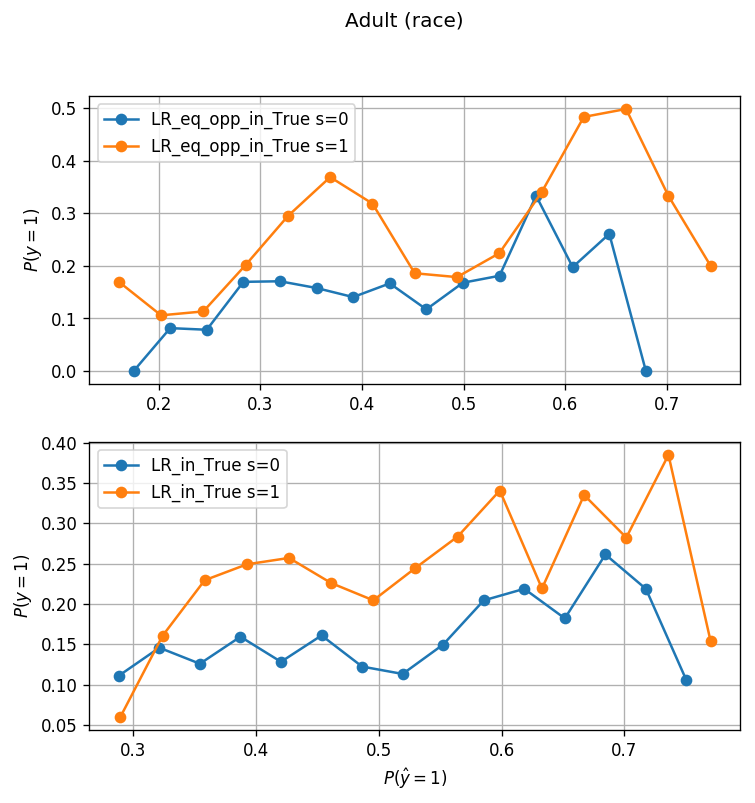

In [21]:
fig, plots = plt.subplots(2, 1, figsize=(7, 7), dpi=120)
plots[0].plot(*conf_acc_s0['ULR_eq_opp_in_True']['race'], 'o-', label='LR_eq_opp_in_True s=0')
plots[0].plot(*conf_acc_s1['ULR_eq_opp_in_True']['race'], 'o-', label='LR_eq_opp_in_True s=1')
#plot.plot(*conf_acc['UGP_eq_opp_in_False']['race'][1], 'o-', label='UGP_eq_opp_in_False')
plots[1].plot(*conf_acc_s0['ULR_in_True']['race'], 'o-', label='LR_in_True s=0')
plots[1].plot(*conf_acc_s1['ULR_in_True']['race'], 'o-', label='LR_in_True s=1')
#plot.plot(*conf_acc['UGP_in_False']['race'][1], 'o-', label='UGP_in_False', color="red")
#plot.plot([0.48, 0.52], [0.48, 0.52])
fig.suptitle('Adult (race)')
plots[1].set_xlabel('$P(\\hat{y}=1)$')
for plot in plots:
    plot.set_ylabel('$P(y=1)$')
    plot.grid()
    plot.legend()
    #plot.set_xlim((.47, .54))
fig.savefig('confidence_adult_race_by_s_lr.svg')

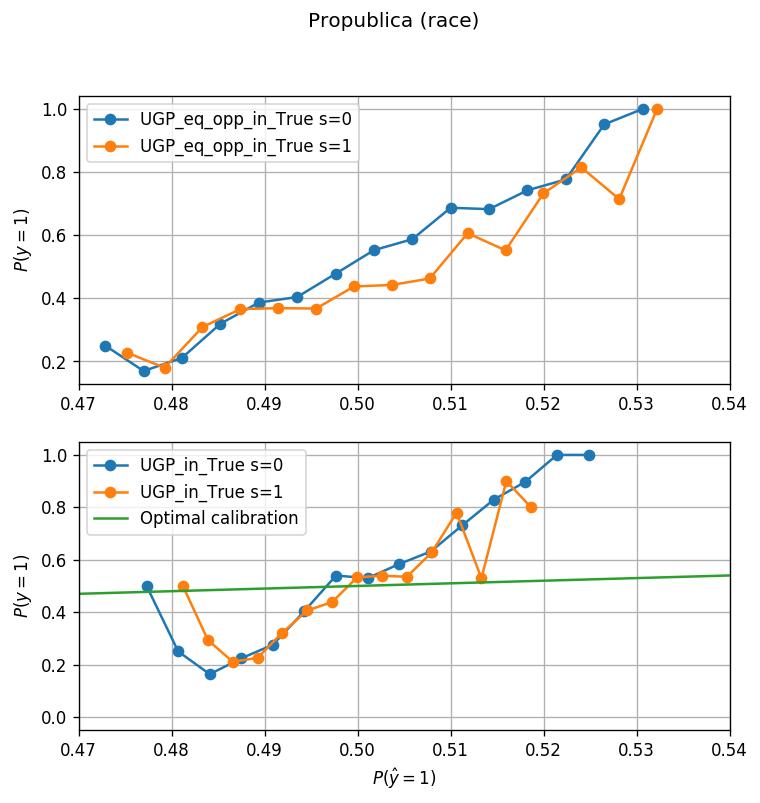

In [9]:
plot.plot([0, 1], [0, 1], label='Optimal calibration')
plot.legend()
fig.savefig('confidence_adult_with_optimal_scaled.svg')
fig

In [18]:
apply_to_all(tpr_diff_and_accuracy, results, dataset)

{'ULR_eq_opp_in_False': {'race': {0: (0.012900243883250728,
    0.37841869716558924),
   1: (0.0017012823538667295, 0.5749378418697165),
   2: (0.03793957989143261, 0.7001491795126803)}},
 'ULR_eq_opp_in_True': {'race': {0: (0.22780072378255045, 0.6546991546494282),
   1: (0.032985209660923616, 0.5115862754848334),
   2: (0.05225395326882228, 0.7495773247140726)}},
 'ULR_in_False': {'race': {0: (0.08598261348438357, 0.43460964694181997),
   1: (0.06713083156321298, 0.6522128294380904),
   2: (0.037825505467705134, 0.7429139731476877)}},
 'ULR_in_True': {'race': {0: (0.005178585477145781, 0.521730482347091),
   1: (0.09076980568011961, 0.6852312282446544),
   2: (0.04089568090630169, 0.26882148184982596)}}}